In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [71]:
data = pd.read_csv("C:/Users/senth/Downloads/credit_card.csv",na_values = '?')

In [72]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [73]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [74]:
data.shape

(8950, 18)

In [75]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [77]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [78]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(),inplace=True)

In [79]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(),inplace=True)

In [80]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a0842db370>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0841b0130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0842db820>],
 'medians': [<matplotlib.lines.Line2D at 0x2a08419d700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a08419deb0>],
 'means': []}

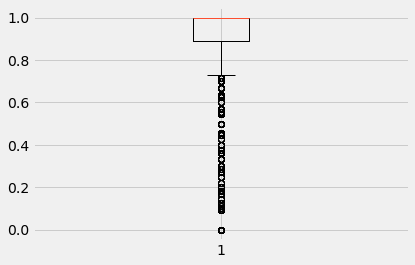

In [81]:
plt.boxplot(data.BALANCE_FREQUENCY)                      

In [82]:
q3=data.BALANCE_FREQUENCY.quantile(0.75)
q1=data.BALANCE_FREQUENCY.quantile(0.25)
iqr=q3-q1
print(iqr)

0.11111099999999996


In [83]:
ue=q3+1.5*(iqr)
print(ue)
le=q1-1.5*(iqr)
print(le)

1.1666664999999998
0.7222225000000001


In [84]:
data[(data.BALANCE_FREQUENCY<ue)&(data.BALANCE_FREQUENCY>le)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [85]:
data.BALANCE_FREQUENCY[data.BALANCE_FREQUENCY>ue]=ue
data.BALANCE_FREQUENCY[data.BALANCE_FREQUENCY<le]=le

C:\Users\senth\AppData\Local\Temp/ipykernel_9988/2931403822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BALANCE_FREQUENCY[data.BALANCE_FREQUENCY>ue]=ue
C:\Users\senth\AppData\Local\Temp/ipykernel_9988/2931403822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BALANCE_FREQUENCY[data.BALANCE_FREQUENCY<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2a084127cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0841272e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0841405b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a084127d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a08275fb20>],
 'means': []}

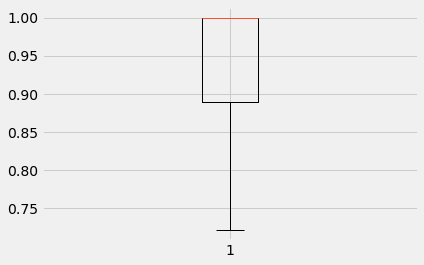

In [86]:
plt.boxplot(data.BALANCE_FREQUENCY)                      

{'whiskers': [<matplotlib.lines.Line2D at 0x2a083824a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0840eb3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a083824fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a0840ebb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a0840eb580>],
 'means': []}

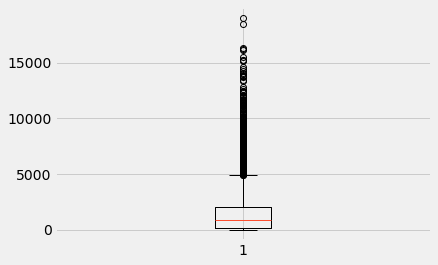

In [87]:
plt.boxplot(data.BALANCE)                      

In [88]:
q3=data.BALANCE.quantile(0.75)
q1=data.BALANCE.quantile(0.25)
iqr=q3-q1
print(iqr)

1925.85812


In [89]:
ue=q3+1.5*(iqr)
print(ue)
le=q1-1.5*(iqr)
print(le)

4942.9272155
-2760.5052645


In [90]:
data[(data.BALANCE<ue)&(data.BALANCE>le)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.722223,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [91]:
data.BALANCE[data.BALANCE>ue]=ue
data.BALANCE[data.BALANCE<le]=le

C:\Users\senth\AppData\Local\Temp/ipykernel_9988/4148300529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BALANCE[data.BALANCE>ue]=ue
C:\Users\senth\AppData\Local\Temp/ipykernel_9988/4148300529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BALANCE[data.BALANCE<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x2a08433dca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a084339400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a08433d910>],
 'medians': [<matplotlib.lines.Line2D at 0x2a084339b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a084339eb0>],
 'means': []}

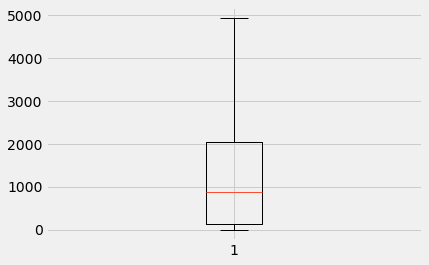

In [92]:
plt.boxplot(data.BALANCE)

In [93]:
datadendro=data.loc[0:9]
datadendro.shape

(10, 18)

In [94]:
New_datadendro=datadendro.drop("CUST_ID",axis=1)

In [95]:
New_data=data.drop("CUST_ID",axis=1)

In [96]:
scaleddata=preprocessing.normalize(New_data)
scaleddatadendro=preprocessing.normalize(New_datadendro)

In [97]:
scaleddata=pd.DataFrame(scaleddata)
scaleddatadendro=pd.DataFrame(scaleddatadendro)

In [98]:
scaleddatadendro.columns=New_datadendro.columns

In [99]:
scaleddata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000090,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


In [100]:
linkeddata=sch.linkage(scaleddata)
linkeddatadendro=sch.linkage(scaleddatadendro)

{'icoord': [[65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [35.0, 35.0, 53.75, 53.75],
  [85.0, 85.0, 95.0, 95.0],
  [44.375, 44.375, 90.0, 90.0],
  [25.0, 25.0, 67.1875, 67.1875],
  [15.0, 15.0, 46.09375, 46.09375],
  [5.0, 5.0, 30.546875, 30.546875]],
 'dcoord': [[0.0, 0.13735508530239238, 0.13735508530239238, 0.0],
  [0.0, 0.1821313562612055, 0.1821313562612055, 0.13735508530239238],
  [0.0, 0.18473196362401123, 0.18473196362401123, 0.1821313562612055],
  [0.0, 0.2045161574467344, 0.2045161574467344, 0.18473196362401123],
  [0.0, 0.28917560636637574, 0.28917560636637574, 0.0],
  [0.2045161574467344,
   0.4154332350731468,
   0.4154332350731468,
   0.28917560636637574],
  [0.0, 0.5073250069992845, 0.5073250069992845, 0.4154332350731468],
  [0.0, 0.5961831000922618, 0.5961831000922618, 0.5073250069992845],
  [0.0, 0.6388454412996296, 0.6388454412996296, 0.5961831000922618]],
 'ivl': ['1', '5', '6', '0', '3', '2', '8', '9', '4', '7'],
 'leaves': [1,

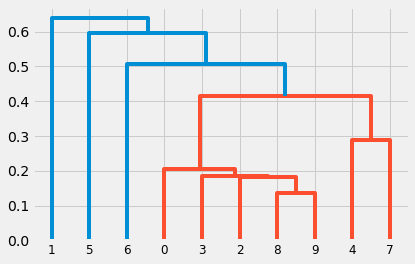

In [101]:
sch.dendrogram(linkeddatadendro)

In [102]:
features, true_labels = make_blobs(
   ...:     n_samples=200,
   ...:     centers=3,
   ...:     cluster_std=2.75,
   ...:     random_state=42
   ...: )


In [103]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [104]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [105]:
scaler = StandardScaler()
   ...: scaled_features = scaler.fit_transform(features)


In [106]:
scaled_features[:5]


array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [107]:
x=data.drop("CUST_ID",axis=1)

In [108]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42 )

In [109]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [110]:
kmeans.inertia_

74.57960106819854

In [111]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [112]:
kmeans.n_iter_
Out[11]: 6

In [113]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [114]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\senth\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


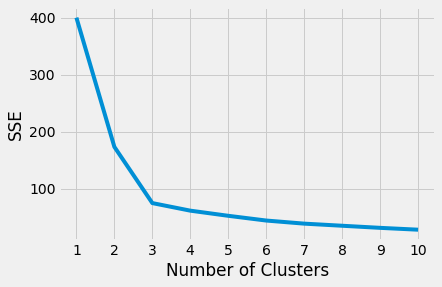

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [116]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [117]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

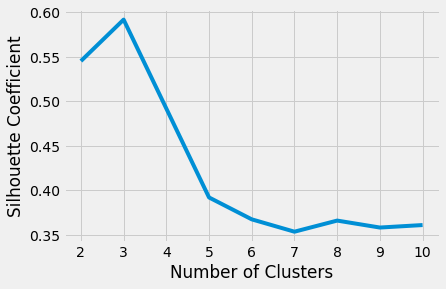

In [118]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(x,train_size=0.8,test_size=0.2,random_state=10)

In [120]:
from sklearn.decomposition import PCA
pca=PCA()

In [129]:
pca.fit(train_x)

PCA()

In [127]:
cumsum=np.cumsum(z)
cumsum

array([PCA()], dtype=object)

In [ ]:
plt.plot(cumsum)